In [1]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

from zadania import GradientBoostingClassifier

In [2]:
# http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

def plot_decision_boundary(X, y, model, step):
    n_classes = 2
    plot_colors = "yb"

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/100.),
                         np.arange(y_min, y_max, (y_max-y_min)/100.))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], step=step)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label="class: "+str(i),
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15, alpha=.5)

    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")

def plot_accuracy(X, y, model, n_models):
    plt.plot(np.arange(n_models + 1), [accuracy_score(y, model.predict(X, step)) for step in range(n_models + 1)])

In [3]:
def breast_cancer():
    data = load_breast_cancer()
    X = data.data
    # robimy PCA do 2 wymiarów, żeby się dało narysować
    # bez PCA dostajemy wyższe accuracy
    X = PCA(n_components=2, random_state=43).fit_transform(X)
    y = data.target
    return X, y

def gaussian_mixture():
    rng = np.random.RandomState(seed=43)
    Xs = []
    for _ in range(100):
        mean = 5 * rng.normal(size=2)
        var = rng.normal(size=(2,2))
        var = np.dot(var, var.T) * 5.
        Xs.append(rng.multivariate_normal(
            mean,
            np.array([[.2, 0.], [0., .2]]),
            size=10))
    X = np.concatenate(Xs)
    y = np.concatenate((
        np.zeros(500),
        np.ones(500))).astype(np.int)
    return X, y

def horizontal_lines():
    rng = np.random.RandomState(seed=43)
    X = np.concatenate((
        np.concatenate((
            rng.normal(size=(500,1)),
            np.ones((500,1))), axis=1),
        np.concatenate((
            rng.normal(size=(500,1)),
            -np.ones((500,1))), axis=1)))
    y = np.concatenate((
        np.zeros(500),
        np.ones(500))).astype(np.int)
    return X, y

def parallel_lines():
    X, y = horizontal_lines()
    X = np.dot(
        X,
        np.array([[.6, -.8],[.8, .6]]))
    return X, y

In [4]:
# Potrzebujemy model, który działa na danych ciągłych (cechy oraz predykcje)
# Można skorzystać z poniższych przykładów albo użyć własnych implementacji z poprzednich zadań

# drzewo decyzyjne
class DTR:
    def __init__(self, X, y):
        self.m = DecisionTreeRegressor(max_leaf_nodes=2)
        self.m.fit(X, y)
    def predict(self, X):
        return self.m.predict(X)

# regresja liniowa
class LR:
    def __init__(self, X, y):
        self.m = LinearRegression()
        self.m.fit(X, y)
    def predict(self, X):
        return self.m.predict(X)

Gammas:
 [  5.70117925  12.58574742  13.4828308   15.51392183  14.14586302
  17.75789165  17.22954414  18.52119753  18.82641551  13.39940918
  19.65350541  15.30204408  20.22754388  14.52755842  16.01943757
  17.2255663   19.73704949  18.41582262  18.17609737  15.24856807
  16.50571544  16.77825252  17.39528701  17.14353318  18.85472414
  18.00423765  19.95869886  17.50100588  20.41191652  21.57350311
  19.63971538  17.54851925  19.08842076  14.11314098  14.49728288
  15.34509863  17.78491704  14.94293909  18.98190056  15.41438247
  17.05668952  16.50037807  19.10571074  19.92934252  17.0223148
  16.87896954  19.43152405  17.39815951  16.7246072   20.9852654 ]


<IPython.core.display.Javascript object>


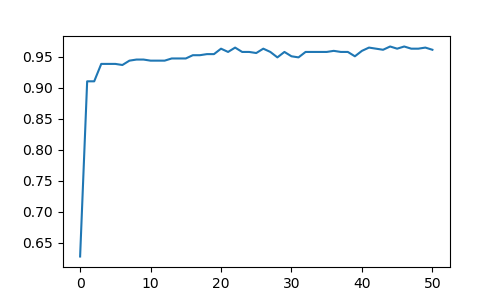

<IPython.core.display.Javascript object>


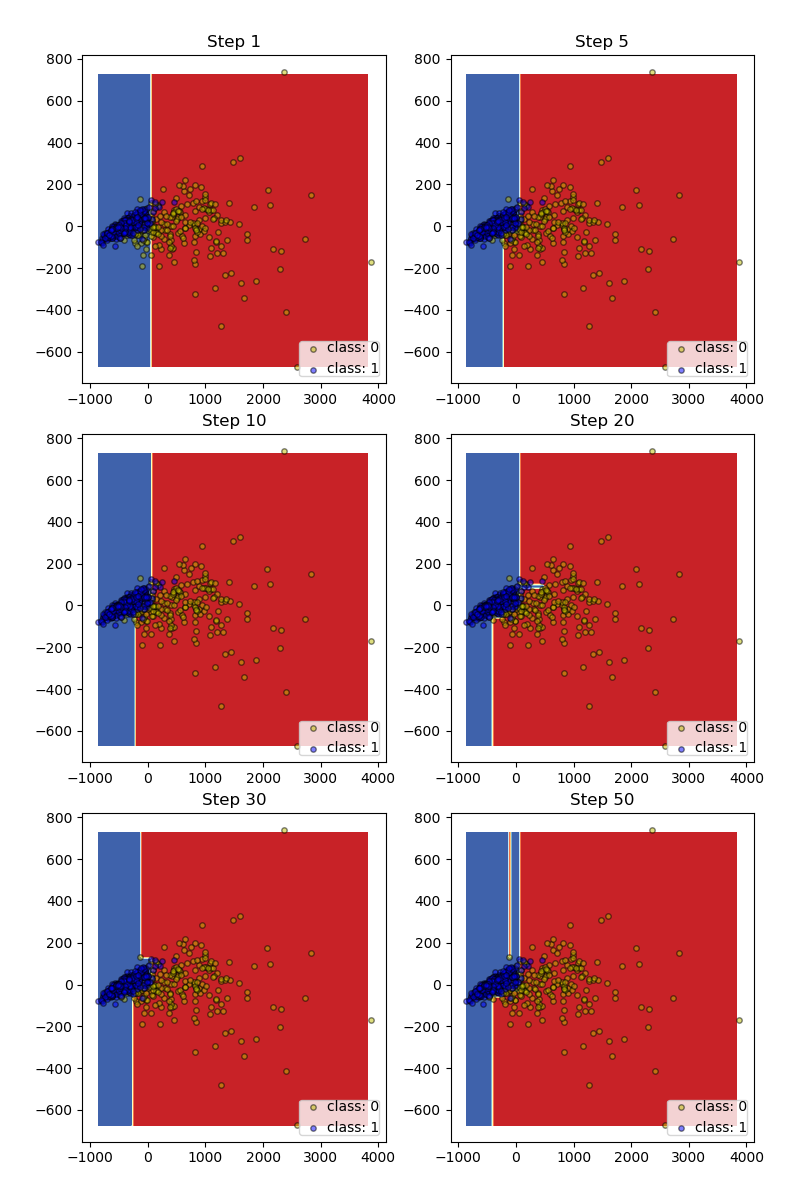

In [5]:
###########################
# DATASET: BREAST CANCER  #
# MODEL: DRZEWO DECYZYJNE #
###########################

X, y = breast_cancer()
n_models = 50
show_steps = [1,5,10,20,30,50]

gbc = GradientBoostingClassifier(
    X=X,
    y=y,
    n_models=n_models,
    model_cls=DTR,
    train_fraction=.7,
    initial_gamma=.1,
    gamma_n_steps=250,
    seed=43)

print("Gammas:\n", np.array(gbc.gammas))

plt.figure(figsize=(5,3))
plt.subplot(1, 1, 1)
plot_accuracy(X, y, model=gbc, n_models=n_models)

n_cols = int(np.sqrt(len(show_steps)))
n_rows = int(np.ceil(len(show_steps)/n_cols))
plt.figure(figsize=(8,int(8*n_rows/n_cols)))
for i, step in zip(range(len(show_steps)), show_steps):
    plt.subplot(n_rows, n_cols, i+1)
    plt.title("Step " + str(step))
    plot_decision_boundary(X, y, model=gbc, step=step)

plt.show()

Gammas:
 [ 10.63009249  47.46720253  47.95115839  48.26550398  48.48328907
  48.64013097  48.75558032  48.84130395  48.90471355  48.95075335
  48.98285415  49.00347536  49.01442925  49.01708325  49.0124907
  49.00147807  48.98470463  48.96270425  48.93591528  48.9047023
  48.86937222  48.83018638  48.7873697   48.74111774  48.69160226
  48.63897549  48.58337356  48.52491926  48.4637242   48.39989065
  48.33351297  48.26467879  48.19347003  48.11996369  48.04423255
  47.96634572  47.88636913  47.80436592  47.72039679  47.63452027
  47.54679299  47.45726984  47.36600419  47.27304801  47.17845201
  47.08226573  46.98453766  46.88531529  46.78464519  46.68257305]


<IPython.core.display.Javascript object>


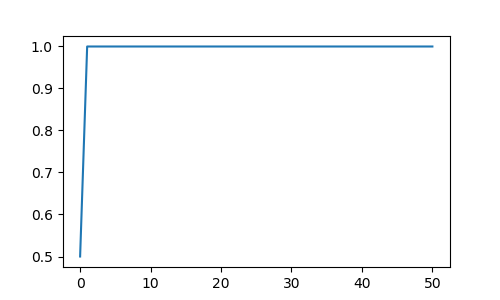

<IPython.core.display.Javascript object>


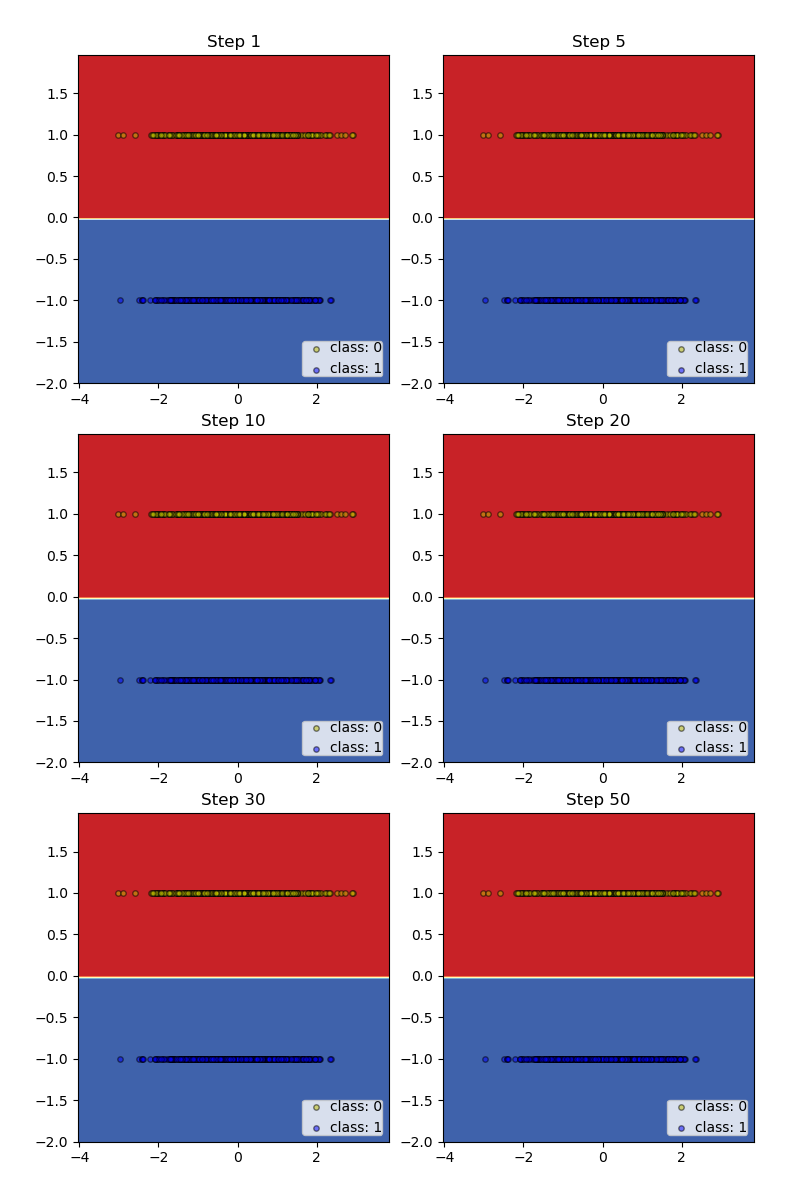

In [6]:
#############################
# DATASET: HORIZONTAL LINES #
# MODEL: DRZEWO DECYZYJNE   #
#############################

X, y = horizontal_lines()
n_models = 50
show_steps = [1,5,10,20,30,50]

gbc = GradientBoostingClassifier(
    X=X,
    y=y,
    n_models=n_models,
    model_cls=DTR,
    train_fraction=.7,
    initial_gamma=.1,
    gamma_n_steps=500,
    seed=43)

print("Gammas:\n", np.array(gbc.gammas))

plt.figure(figsize=(5,3))
plt.subplot(1, 1, 1)
plot_accuracy(X, y, model=gbc, n_models=n_models)

n_cols = int(np.sqrt(len(show_steps)))
n_rows = int(np.ceil(len(show_steps)/n_cols))
plt.figure(figsize=(8,int(8*n_rows/n_cols)))
for i, step in zip(range(len(show_steps)), show_steps):
    plt.subplot(n_rows, n_cols, i+1)
    plt.title("Step " + str(step))
    plot_decision_boundary(X, y, model=gbc, step=step)

plt.show()

Gammas:
 [  5.74973547   6.53423493   8.41842361  25.65047241  19.24969535
   8.36246092   8.60479795  42.86944533  31.82918188  45.47855345
  41.22262939  46.49034153  46.92613668  47.38649149  44.01231294
  47.70503788  47.9603376   46.3867493   48.08610043  45.75269488
  48.29233218  48.33428175  48.25557051  46.26239114  46.51727798
  48.50736437  48.56230513  48.56207467  46.80899076  48.58163394
  48.66652622  47.30560848  48.01884539  48.60654628  48.70731679
  48.59123403  47.35293083  47.08137233  48.69018497  48.59695158
  47.56029796  48.62757144  48.54075111  47.35752498  48.09071482
  48.60699052  48.4900367   47.88415131  48.51411223  48.42701734]


<IPython.core.display.Javascript object>


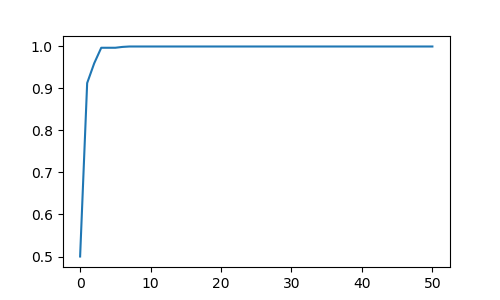

<IPython.core.display.Javascript object>


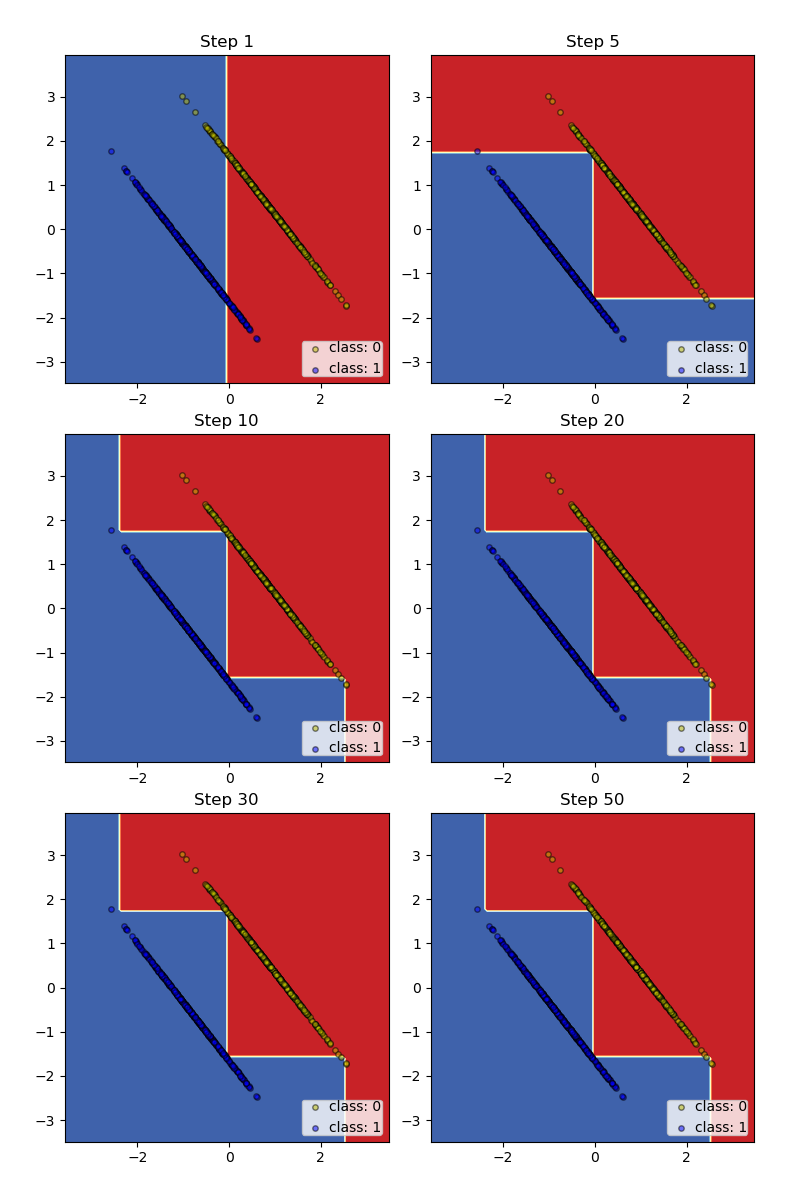

In [7]:
###########################
# DATASET: PARALLEL LINES #
# MODEL: DRZEWO DECYZYJNE #
###########################

X, y = parallel_lines()
n_models = 50
show_steps = [1,5,10,20,30,50]

gbc = GradientBoostingClassifier(
    X=X,
    y=y,
    n_models=n_models,
    model_cls=DTR,
    train_fraction=.7,
    initial_gamma=.1,
    gamma_n_steps=500,
    seed=43)

print("Gammas:\n", np.array(gbc.gammas))

plt.figure(figsize=(5,3))
plt.subplot(1, 1, 1)
plot_accuracy(X, y, model=gbc, n_models=n_models)

n_cols = int(np.sqrt(len(show_steps)))
n_rows = int(np.ceil(len(show_steps)/n_cols))
plt.figure(figsize=(8,int(8*n_rows/n_cols)))
for i, step in zip(range(len(show_steps)), show_steps):
    plt.subplot(n_rows, n_cols, i+1)
    plt.title("Step " + str(step))
    plot_decision_boundary(X, y, model=gbc, step=step)

plt.show()

Gammas:
 [ 5.06575007  4.40845591  4.63982322  7.89679614  4.615098    4.47244453
  4.65160035  4.77092783  5.43414768  4.84236692  5.89899588  5.4262547
  4.93681753  9.70017428  4.99747775  5.54778432  4.89282995  4.86571089
  6.32711618  5.79309479  5.10371313  4.94480635  5.36801503  4.91934987
  4.96006032  5.1870557   5.07583904  4.85030474  5.91562589  6.01164373
  5.12118257  5.23769598  5.09613898  5.04731898  5.03497087  5.07357372
  5.22572761  5.2423812   5.19218294  5.07017934  5.15844953  4.77349669
  5.24843563  5.09549391  6.09244657  4.9489821   5.19735328  5.28718775
  5.29541437  5.20856592]


<IPython.core.display.Javascript object>


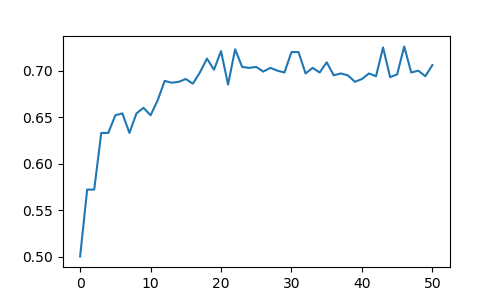

<IPython.core.display.Javascript object>


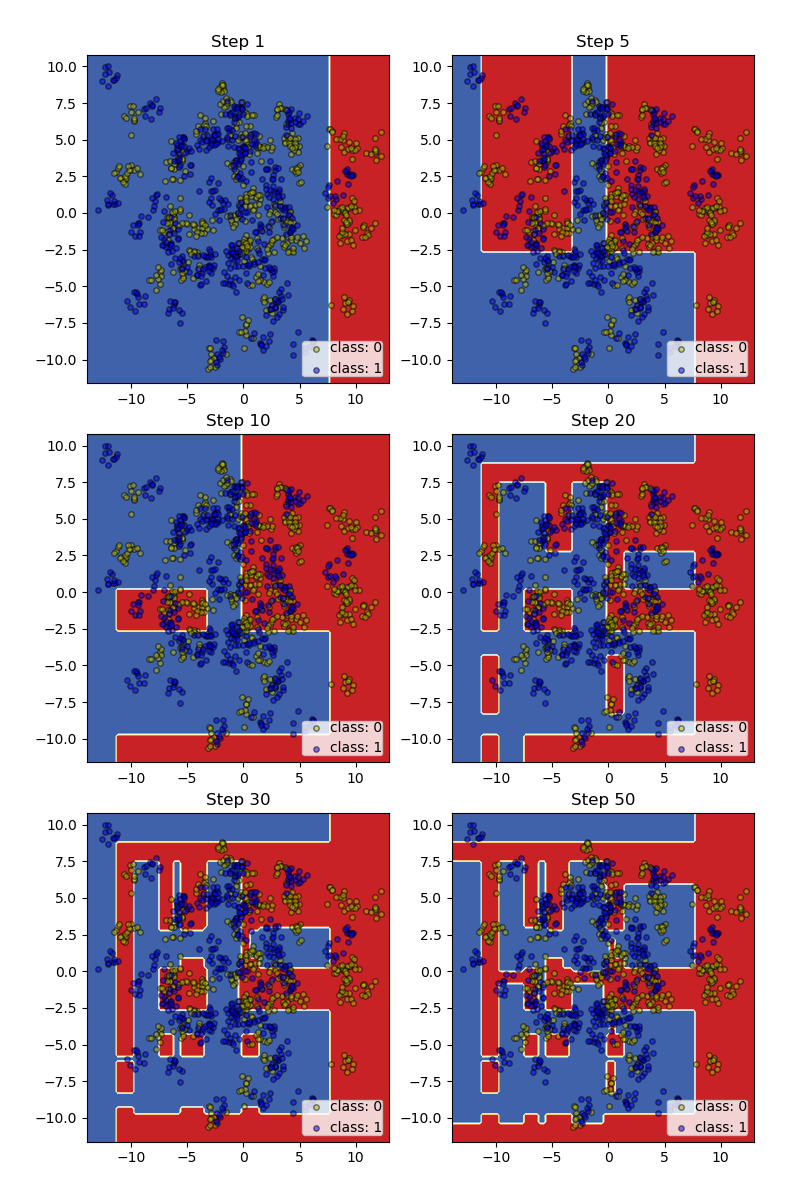

In [8]:
#############################
# DATASET: GAUSSIAN MIXTURE #
# MODEL: DRZEWO DECYZYJNE   #
#############################

X, y = gaussian_mixture()
n_models = 50
show_steps = [1,5,10,20,30,50]

gbc = GradientBoostingClassifier(
    X=X,
    y=y,
    n_models=n_models,
    model_cls=DTR,
    train_fraction=.7,
    initial_gamma=.1,
    gamma_n_steps=250,
    seed=43)

print("Gammas:\n", np.array(gbc.gammas))

plt.figure(figsize=(5,3))
plt.subplot(1, 1, 1)
plot_accuracy(X, y, model=gbc, n_models=n_models)

n_cols = int(np.sqrt(len(show_steps)))
n_rows = int(np.ceil(len(show_steps)/n_cols))
plt.figure(figsize=(8,int(8*n_rows/n_cols)))
for i, step in zip(range(len(show_steps)), show_steps):
    plt.subplot(n_rows, n_cols, i+1)
    plt.title("Step " + str(step))
    plot_decision_boundary(X, y, model=gbc, step=step)

plt.show()

Gammas:
 [ 4.16808005  4.29298137  4.44340831  4.45625684  4.20312748  4.18242286
  4.19243483  4.40193805  4.32336876  4.15657754  4.30686804  4.45694905
  4.26906964  4.18612782  4.20212909  4.14033879  4.14550309  4.28514313
  4.19991302  4.54980761  4.56720885  4.21030917  4.29280685  4.24633247
  4.12809832  4.13950308  4.22667595  4.19343959  4.42568867  4.40052566
  4.25625866  4.32282571  4.17700959  4.17301455  4.1440659   4.16878363
  4.19330282  4.27759656  4.17419858  4.23877071  4.20841164  4.22433735
  4.5394106   4.58790154  4.24950255  4.20467441  4.34716693  4.29468853
  4.26291258  4.42857969]


<IPython.core.display.Javascript object>


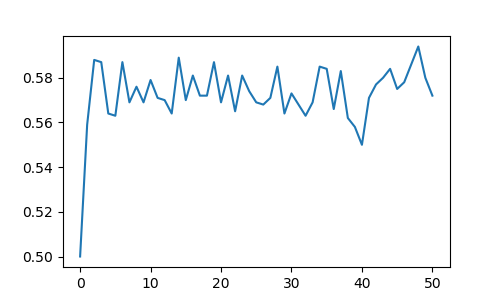

<IPython.core.display.Javascript object>


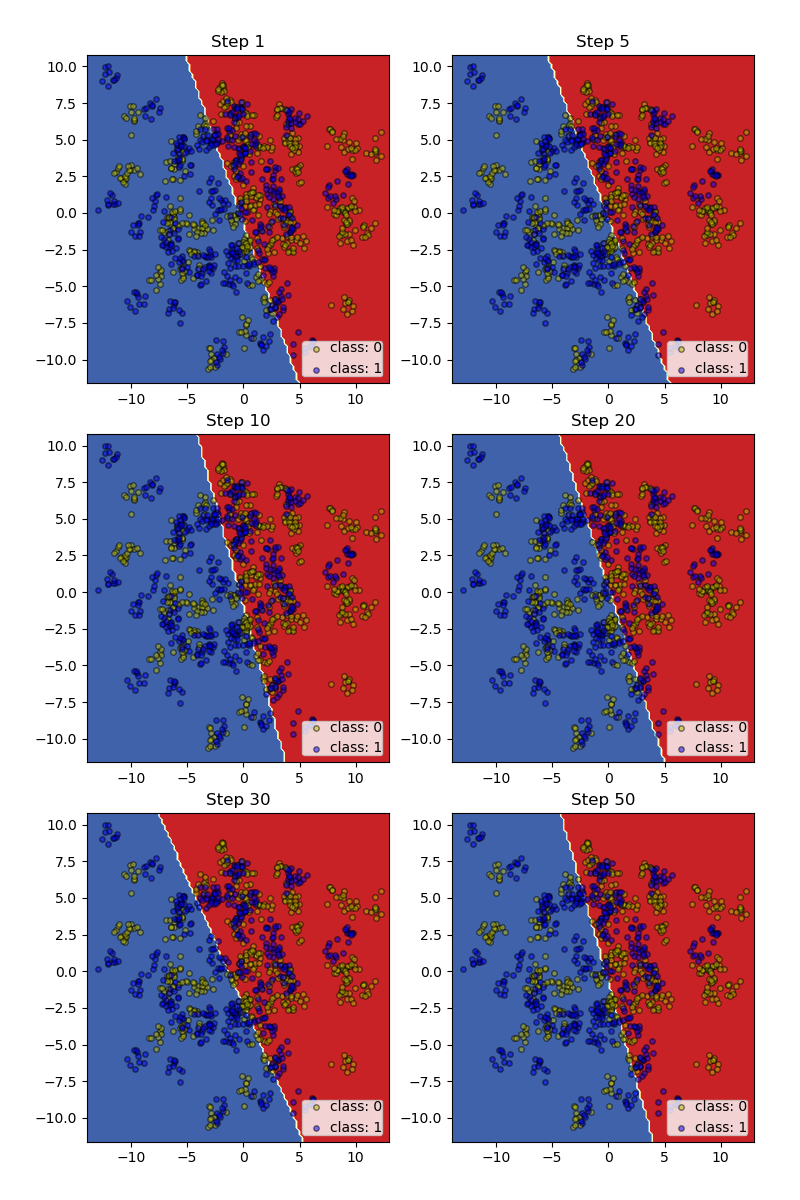

In [9]:
#############################
# DATASET: GAUSSIAN MIXTURE #
# MODEL: REGRESJA LINIOWA   #
#############################

X, y = gaussian_mixture()
n_models = 50
show_steps = [1,5,10,20,30,50]

gbc = GradientBoostingClassifier(
    X=X,
    y=y,
    n_models=n_models,
    model_cls=LR,
    train_fraction=.7,
    initial_gamma=.1,
    gamma_n_steps=250,
    seed=43)

print("Gammas:\n", np.array(gbc.gammas))

plt.figure(figsize=(5,3))
plt.subplot(1, 1, 1)
plot_accuracy(X, y, model=gbc, n_models=n_models)

n_cols = int(np.sqrt(len(show_steps)))
n_rows = int(np.ceil(len(show_steps)/n_cols))
plt.figure(figsize=(8,int(8*n_rows/n_cols)))
for i, step in zip(range(len(show_steps)), show_steps):
    plt.subplot(n_rows, n_cols, i+1)
    plt.title("Step " + str(step))
    plot_decision_boundary(X, y, model=gbc, step=step)

plt.show()

### Pytania do dyskusji

Dlaczego gammy mają tak duże wartości (gamma w pewnym sensie odpowiada learning rate w klasycznym uczeniu gradientowym)?

Jak wytłumaczyć zachowanie gammy w wypadku datasetów `parallel_lines` oraz `horizontal_lines`?

Ile wynosi optymalna gamma, jeśli dane są liniowo separowalne i model się tego nauczył?

Dlaczego w ostatnim przypadku boosting nie zadziałał?